# TP 1 : Équation de Transport

Le but de ce TP est la résolution numérique par différents
schémas aux différences sur grille uniforme de l'équation de
transport :
\begin{equation}
\begin{cases}
\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0
\quad x \in [-\pi,\pi], t\in I\!\!R,\\
u(x,0)=u_0(x)\\
u(.,t) \quad 2\pi\text{-périodique}
\end{cases} \quad \quad(1)
\end{equation}


Pour la suite on fixe $a=1$ et l'intervalle de temps de notre étude
$[0,T]$ avec $T=8$. On note $k$ le pas de temps, $n$ l'indice
au temps $t_n$, $h$ le pas en espace et $m$ l'indice au point $x_m$.

Pour les différents tests on prendra les 2 conditions initiales :
\begin{equation*}
u_0^1(x)=
\begin{cases}
e^{\frac{1}{x^2-1}} &\text{si } |x| < 1\\
0 &\text{sinon}
\end{cases}
\quad\text{et}\quad
u_0^2(x)=
\begin{cases}
1-|x| &\text{si } |x| < 1\\
0 &\text{sinon}
\end{cases}
\end{equation*}



In [104]:
using Interact

In [105]:
using PyPlot # bibliothèque d'affichage 

In [129]:
function u_01(x)
    while (x>pi)
        x=x-2*pi
    end
    while (x<-pi)
        x=x+2*pi
    end
    
    if abs(x)<1
        return out=exp(1/(x^2-1));
    else
        return out=0
    end
end

function u_02(x)
    while x>pi
        x=x-2*pi
    end
    while x<-pi
        x=x+2*pi
    end
    
    if abs(x)<1
        return out=1-abs(x);
    else
        return out=0
    end
end

u_02 (generic function with 1 method)

### Donner les solution exactes du problème (1).

### Implémenter les schémas suivants. 

Il s'agit
de schémas à un pas, il est possible d'utiliser une représentation
matricielle commune de la forme $AU_{n+1}=BU_n$, avec $A$ et $B$ matrices et
$U_n$ solution discrête au temps $t_n$.



Obtenir une animation avec la supperposition de la solution exacte et
solution calculée pour chaque cas.

Donner l'ordre des schémas, ainsi que les conditions de stabilité. Calculer et représenter le symboles de chaque schéma (voir cours), illustrer vos calcul par des choix judicieux de simulations et de
courbes.

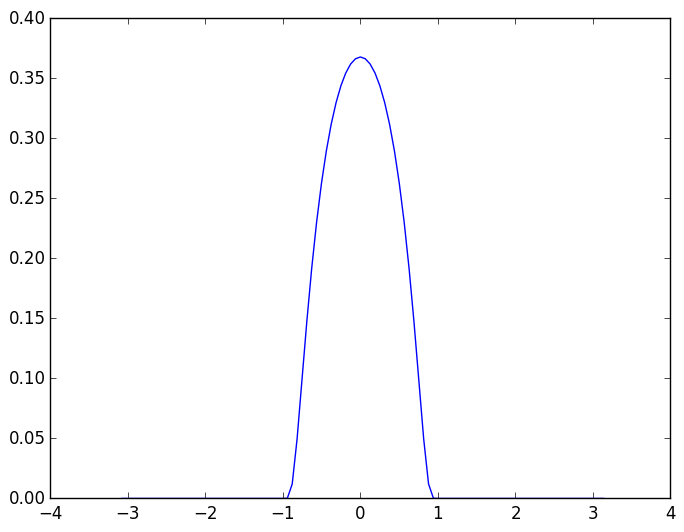

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f253ee52550>

In [130]:
# Paramètres de simulation
# espace
N=100;
h=2*pi/N;
x=linspace(-pi,pi,N+1)';

# temps
k=0.9*h;

# initialisation
U0=zeros(N,1);
for i=1:N
    U0[i]=u_01(x[i+1])
end

plot(x[2:end],U0)

## Schéma de Courant

\begin{equation}
\begin{cases}
\frac{1}{k}(u_m^{n+1}-u_m^{n})+\frac{a}{h}(u_m^{n}-u_{m-1}^{n})=0\\
u^0_m=u_0(x_m)
\end{cases}
\end{equation}

In [108]:
A=spzeros(N,N);
for i=1:N
    A[i,i]=1-k/h
end
for i=2:N
    A[i,i-1]=k/h
end
A[1,N]=k/h;

Slider{Int64}([Input{Int64}] 251,"i1",251,1:501)

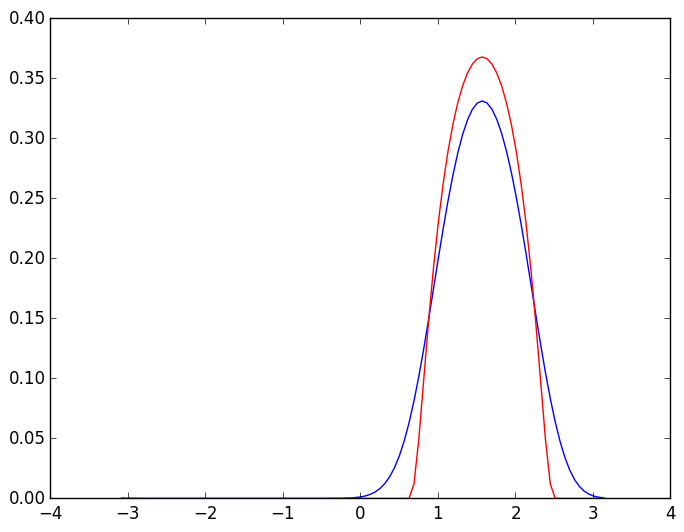

In [109]:
M=U0; Mex=U0;
U=U0;
for n=1:500
    U=A*U
    M=hcat(M,U);
    tmp=zeros(N,1);
    for i=1:N
        tmp[i]=u_01(x[i+1]-n*k)
    end
    Mex=hcat(Mex,tmp);
end

f = figure()
@manipulate  for i1=1:size(M,2)
    withfig(f) do
        plot(x[2:end],M[:,i1],"b-",x[2:end],Mex[:,i1],"r-")
    end
end

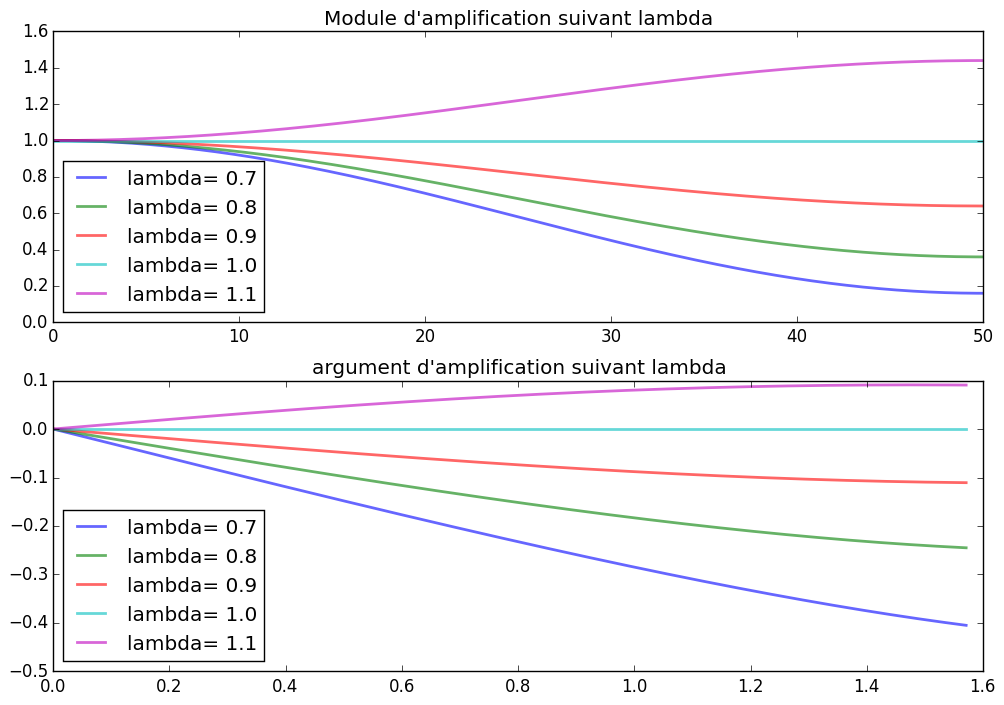

PyObject <matplotlib.legend.Legend object at 0x7f253f154ad0>

In [128]:
function module_g(lambda,w)
    out = 1 - 2*lambda*(1-lambda)*(1-cos(w*h))
end
function arg_g(lambda,w)
    out=zeros(w);
    for i=1:length(w)
        out[i] = atan2(lambda*sin(w[i]),1-lambda*(1-cos(w[i])))
    end
    return out
end

W=linspace(0,pi/h,1000);
fig, axes = PyPlot.subplots(2, 1, figsize=(12, 8))

ax = axes[1, 1]
for lambda=0.7:0.1:1.1
   ax[:plot](W, module_g(lambda,W), linewidth=2, alpha=0.6, label="lambda= $lambda")
end
ax[:set_title]("Module d'amplification suivant lambda")
ax[:legend](loc=3)

ax = axes[2, 1]
W=linspace(0,pi/2,1000);
for lambda=0.7:0.1:1.1
    ax[:plot](W, arg_g(lambda,W)-W, linewidth=2, alpha=0.6, label="lambda= $lambda")
end
ax[:set_title]("argument d'amplification suivant lambda")
ax[:legend](loc=0)
    

In [50]:
arg_g(1,W)

## Schéma de Lax

\begin{equation}
\begin{cases}
\frac{1}{k}(u_m^{n+1}-\frac{1}{2}(u_{m+1}^{n}+u_{m-1}^{n}))
+\frac{a}{2h}(u_{m+1}^{n}-u_{m-1}^{n})=0\\
u^0_m=u_0(x_m)
\end{cases}
\end{equation}

In [90]:
A=spzeros(N,N);
for i=2:N
    A[i,i-1]=1/2+k/h/2;
end
for i=1:N-1
    A[i,i+1]=1/2-k/h/2;
end
A[1,N]=1/2+k/h/2;
A[N,1]=1/2-k/h/2;

Slider{Int64}([Input{Int64}] 251,"i1",251,1:501)

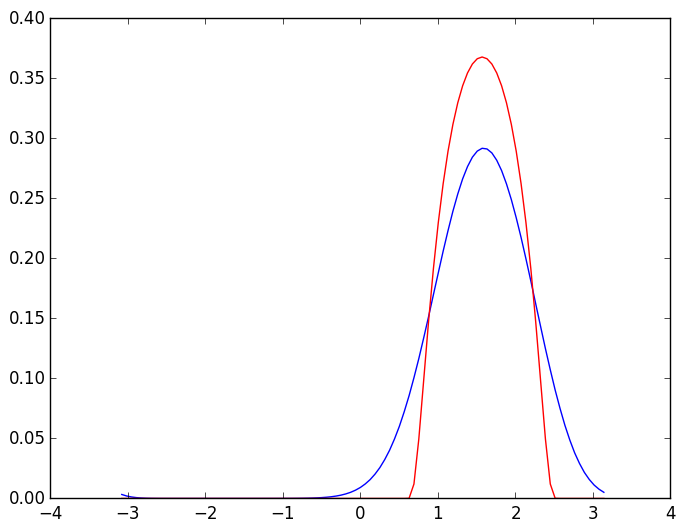

In [91]:
M=U0; Mex=U0;
U=U0;
for n=1:500
    U=A*U
    M=hcat(M,U);
    tmp=zeros(N,1);
    for i=1:N
        tmp[i]=u_01(x[i+1]-n*k)
    end
    Mex=hcat(Mex,tmp);
end

f = figure()
@manipulate  for i1=1:size(M,2)
    withfig(f) do
        plot(x[2:end],M[:,i1],"b-",x[2:end],Mex[:,i1],"r-")
    end
end

## Schéma de Lax Wendroff

\begin{equation}
\begin{cases}
\frac{1}{k}(u_m^{n+1}-u_m^{n}) + 
\frac{a}{2h}(u_{m+1}^{n}-u_{m-1}^{n})
-\frac{a^2 k}{2h^2}(u_{m+1}^{n}-2u_m^{n}+u_{m-1}^{n})=0\\
u^0_m=u_0(x_m)
\end{cases}
\end{equation}

In [93]:
A=spzeros(N,N);
for i=1:N
    A[i,i]=1-(k/h)^2;
end
for i=2:N
    A[i,i-1]=k/h/2+((k/h)^2)/2;
end
for i=1:N-1
    A[i,i+1]=-k/h/2+((k/h)^2)/2;
end
A[1,N]=k/h/2+((k/h)^2)/2;
A[N,1]=-k/h/2+((k/h)^2)/2;

Slider{Int64}([Input{Int64}] 251,"i1",251,1:501)

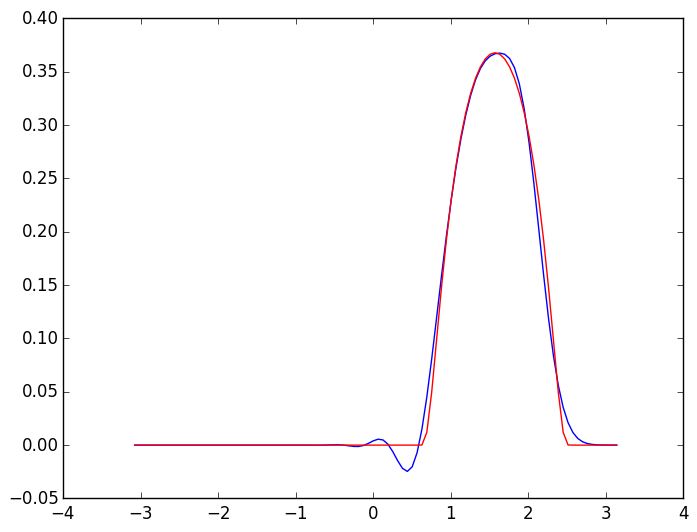

In [94]:
M=U0; Mex=U0;
U=U0;
for n=1:500
    U=A*U
    M=hcat(M,U);
    tmp=zeros(N,1);
    for i=1:N
        tmp[i]=u_01(x[i+1]-n*k)
    end
    Mex=hcat(Mex,tmp);
end

f = figure()
@manipulate  for i1=1:size(M,2)
    withfig(f) do
        plot(x[2:end],M[:,i1],"b-",x[2:end],Mex[:,i1],"r-")
    end
end

## Schéma de Thomé (Box-Sheme)

\begin{equation}
\begin{cases}
\frac{1}{k}(u_m^{n+1}+u_{m+1}^{n+1}-u_m^{n}-u_{m+1}^{n})+
\frac{a}{h}(u_{m+1}^{n+1}+u_{m+1}^{n}-u_{m}^{n+1}-u_{m}^{n})=0\\
u^0_m=u_0(x_m)
\end{cases}
\end{equation}